### 二分类模型
$f(x) = sign(w\cdot x + b)$

$\operatorname{sign}(x)=\left\{\begin{array}{ll}{+1,} & {x \geqslant 0} \\ {-1,} & {x<0}\end{array}\right.$

给定训练集：

$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$

定义感知机的损失函数 

$L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)$

---
#### 算法

随即梯度下降法 Stochastic Gradient Descent

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整$w$, $b$的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

## 1.数据处理，去iris数据集中两个分类的数据和[sepal length,sepal width]为特征

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [8]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['label'] = iris.target

In [10]:
df.columns = [
    'sepal length','sepal width','petal length','petal width','label'
]
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

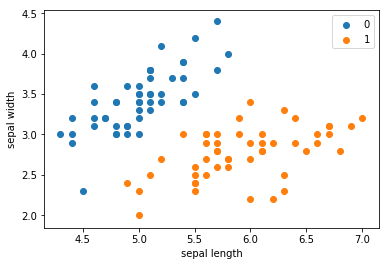

In [13]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label='0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [20]:
data = np.array(df.iloc[:100,[0,1,-1]])


In [15]:
X,y = data[:,:-1],data[:,-1]

In [19]:
y = np.array([1 if i == 1 else -1 for i in y]) #将0/1转成-1/1，相对着sign（）感知机的定义

# 感知机模型 preceptron

In [25]:
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1 , dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
    
    def sign(self,x,w,b):
        y = np.dot(x,w)+b
        return y
    
    #随机梯度下降
    def fit(self,X_train,y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X,self.w,self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y,X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'
    
    def score(self):
        pass

In [26]:
perceptron = Model()
perceptron.fit(X,y)

'Perceptron Model!'

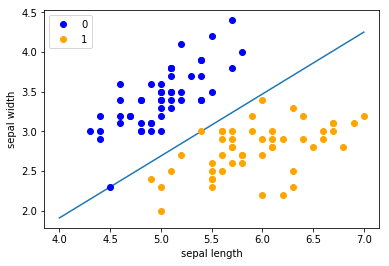

In [43]:
x_points = np.linspace(4,7,10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points,y_)

plt.plot(data[:50,0],data[:50,1],'bo',color = 'blue',label='0')
plt.plot(data[50:100,0],data[50:100,1],'bo',color = 'orange',label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 使用sklearn

In [44]:
import sklearn
from sklearn.linear_model import Perceptron

In [57]:
clf = Perceptron(fit_intercept=True,
                max_iter = 1000,
                tol=None,
                #`tol` 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 `tol=None` 使之可以继续迭代：
                shuffle = True)
clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
clf.coef_ #权重

array([[ 70.7, -87.9]])

In [59]:
clf.intercept_ #截距

array([-117.])

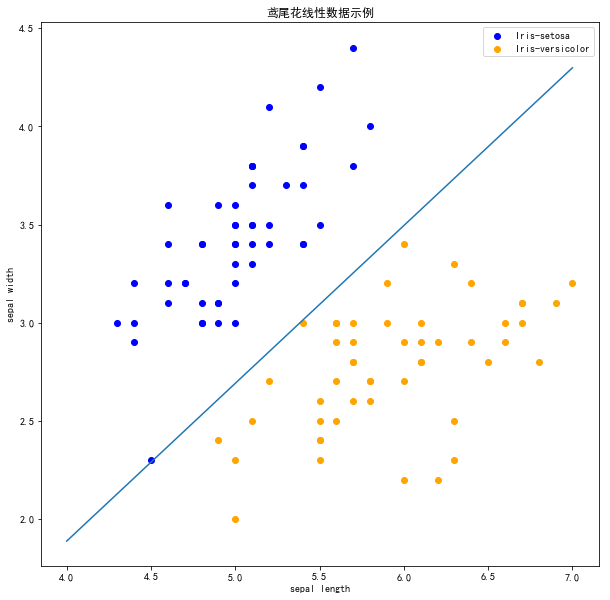

In [60]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()